In [1]:
import numpy as np 

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.compiler import transpile


import matplotlib.pyplot as plt
import matplotlib.image as mpimg


from project_qsiris.conversion_qiskit_qo import circuit_to_puzzle, save_puzzle

## Examples :

### Example_001:

If all the the gates are supported in QO the circuit can be converted directly from qiskit to QO format.

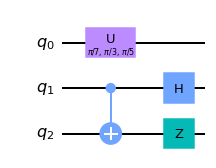

In [2]:
qreg_q = QuantumRegister(3,'q')
circuit = QuantumCircuit(qreg_q)

circuit.cx(qreg_q[1],qreg_q[2])


circuit.h(qreg_q[1])
circuit.z(qreg_q[2])
circuit.u(np.pi/7, np.pi/3, np.pi/5, qreg_q[0])


circuit.draw('mpl')

In [3]:
puzzle = circuit_to_puzzle(circuit, puzzle_type="General")
save_puzzle(puzzle, 'example_001' )

circuit-0 saved:circuits/qiskit_to_odyssey/example_001.qpf


### Example_002

If you have more complex gates it would be better if you transpile your circuit first at least for the moment.

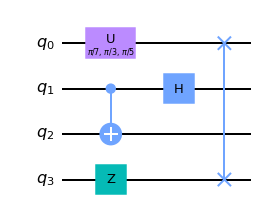

In [4]:
#Step 1: Build the circuit in Qiskit

qreg_q = QuantumRegister(4,'q')
circuit = QuantumCircuit(qreg_q)

circuit.cx(qreg_q[1],qreg_q[2])

circuit.h(qreg_q[1])
circuit.z(qreg_q[3])
circuit.u(np.pi/7,np.pi/3,np.pi/5,qreg_q[0])
circuit.swap(qreg_q[0], qreg_q[3])

circuit.draw('mpl')

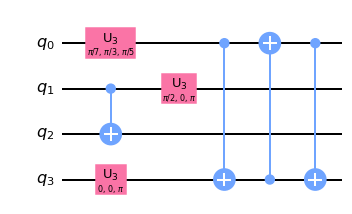

In [5]:
#Step 2: Transpile your Qiskit circuit in simple gates to avoid errors 

circuit = transpile(circuit, basis_gates=['id','u3', 'cx'], optimization_level=1, seed_transpiler=1) 
circuit.draw(output='mpl')

In [7]:
#Step 3: Convert your circuit in dictionary that represents a QO puzzle

puzzle=circuit_to_puzzle(circuit,puzzle_type="General")

#Step 4: Save your puzzle 
save_puzzle(puzzle, 'example_002' )

circuit-1 saved:circuits/qiskit_to_odyssey/example_002.qpf


### Example_003

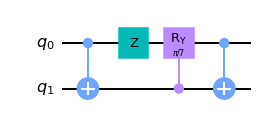

In [8]:
circuit = QuantumCircuit(2,name='matchgate_2Q')

circuit.cx(0,1)
circuit.z(0)
circuit.cry(np.pi/7,1,0)
circuit.cx(0,1)

circuit.draw('mpl')

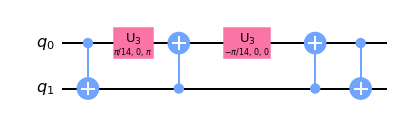

In [9]:
circuit = transpile(circuit, basis_gates=['id','u3', 'cx'], optimization_level=1, seed_transpiler=1) 
circuit.draw(output='mpl')

In [11]:
puzzle = circuit_to_puzzle(circuit)
save_puzzle(puzzle, 'example_003' )

matchgate_2Q saved:circuits/qiskit_to_odyssey/example_003.qpf


Text(0.5, 1.0, 'Circuit in QO as a gate')

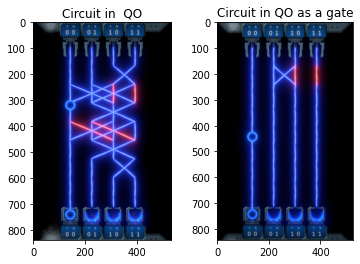

In [12]:
img_circuit = mpimg.imread('img/aa2.png')
img_circuit_gate = mpimg.imread('img/aa3.png')

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_circuit);
ax[1].imshow(img_circuit_gate);

ax[0].set_title('Circuit in  QO')
ax[1].set_title('Circuit in QO as a gate')

In [13]:
puzzle

{'PuzzleDefinition': {'ModuleID': 'Qiskit',
  'ID': 57,
  'QubitCapacity': 2,
  'GateCapacity': 7,
  'Name': 'matchgate_2Q',
  'InitialState': [[{'Real': 1, 'Imaginary': 0, 'Magnitude': 1, 'Phase': 0.0}],
   [{'Real': 0, 'Imaginary': 0, 'Magnitude': 0, 'Phase': 0.0}],
   [{'Real': 0, 'Imaginary': 0, 'Magnitude': 0, 'Phase': 0.0}],
   [{'Real': 0, 'Imaginary': 0, 'Magnitude': 0, 'Phase': 0.0}]],
  'FinalState': [[{'Real': 1, 'Imaginary': 0, 'Magnitude': 1, 'Phase': 0.0}],
   [{'Real': 0, 'Imaginary': 0, 'Magnitude': 0, 'Phase': 0.0}],
   [{'Real': 0, 'Imaginary': 0, 'Magnitude': 0, 'Phase': 0.0}],
   [{'Real': 0, 'Imaginary': 0, 'Magnitude': 0, 'Phase': 0.0}]],
  'FinalBallState': [[{'Real': 1.0,
     'Imaginary': 0.0,
     'Magnitude': 0.0,
     'Phase': 0.0},
    {'Real': 0.0, 'Imaginary': 0.0, 'Magnitude': 0.0, 'Phase': 0.0},
    {'Real': 0.0, 'Imaginary': 0.0, 'Magnitude': 0.0, 'Phase': 0.0},
    {'Real': 0.0, 'Imaginary': 0.0, 'Magnitude': 0.0, 'Phase': 0.0}],
   [{'Real': 0.0, 'Im